In [ ]:
# Loading neccessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#  Reading the csv file
data=pd.read_csv("/content/bat.csv")
# Viewing the top5 rows of the csv file
data.tail(5)

,Player,Team,Type,M,Inn,NO,Runs,HS,Avg,BF,SR,4s,6s,50,100,200
819,Aftab Alam,Afghanistan,Test,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0
820,Dawlat Zadran,Afghanistan,Test,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0
821,Hamid Hassan,Afghanistan,Test,0,0,0,0,0,0.00,0,0.00,0,0,0,0,0
822,Rashid Khan,Afghanistan,Test,4,7,0,106,51,15.14,133,79.70,11,4,1,0,0
823,Mujeeb Ur Rahman,Afghanistan,Test,1,2,0,18,15,9.00,17,105.88,2,1,0,0,0


In [ ]:
# Number of rows and columns.
data.shape

(824, 16)

In [ ]:
# Number of teams
number_of_teams= data['Team'].value_counts()
print(number_of_teams)

Team
India           104
Australia       104
England          80
Ireland          64
Zimbabwe         64
Sri-Lanka        60
West-Indies      60
New-Zealand      60
Afghanistan      60
Pakistan         56
Bangladesh       56
South-Africa     56
Name: count, dtype: int64


In [ ]:
number_of_type= data['Type'].value_counts()
print(number_of_type)



Type
IPL     206
ODI     206
T20     206
Test    206
Name: count, dtype: int64


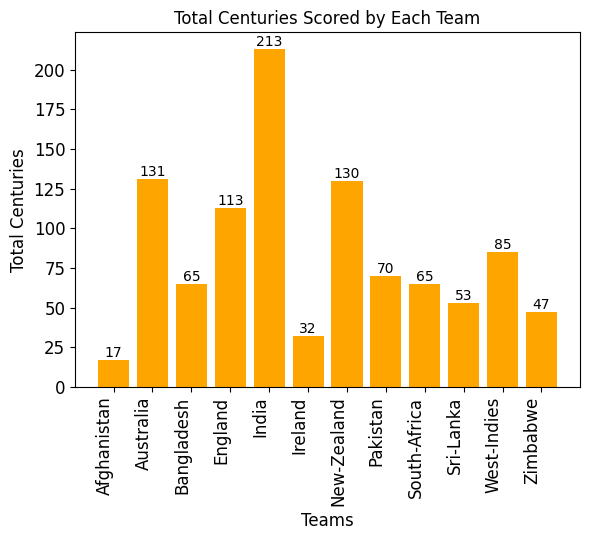

In [ ]:
def plot_team_centuries(data):
    """
    Plot a bar chart showing the total centuries scored by each team.

    Parameters:
        data (DataFrame): Input DataFrame containing player data.

    Returns:
        None
    """
    # Filtering data to include only players who have scored centuries (100s)
    centuries_data = data[data['100'] > 0]

    # Grouping the filtered data by team and counting the number of centuries scored by each team
    team_centuries = centuries_data.groupby('Team')['100'].sum().reset_index()

    # Plotting
    plt.figure(figsize=(6, 5.5))
    bars = plt.bar(team_centuries['Team'], team_centuries['100'], color='orange')

    # Adding exact numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

    plt.xlabel('Teams', fontsize = 12)
    plt.ylabel('Total Centuries', fontsize = 12)
    plt.title('Total Centuries Scored by Each Team', fontsize= 12)
    plt.xticks(rotation=90, ha='right', fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    plt.show()


plot_team_centuries(data)


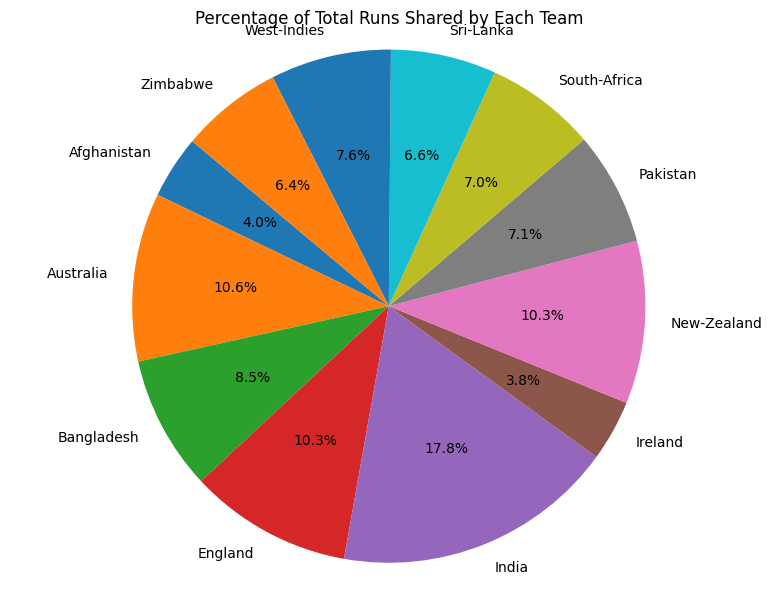

In [ ]:
def plot_runs_share(data_file):
    """
    Plot a pie chart showing the percentage of total runs shared by each team.

    Parameters:
        data_file : File path of the CSV file containing player data.

    Returns:
        None
    """
    # Grouping the data by team and calculating the total runs scored by each team
    team_runs = data.groupby('Team')['Runs'].sum().reset_index()

    # Calculating the total runs scored by all teams
    total_runs = team_runs['Runs'].sum()

    # Calculating the percentage of total runs shared by each team
    team_runs['Percentage'] = (team_runs['Runs'] / total_runs) * 100

    # Creating the pie chart for percentage of total runs shared by each team
    plt.figure(figsize=(8, 6))
    plt.pie(team_runs['Percentage'], labels=team_runs['Team'], autopct='%1.1f%%', startangle=140)
    plt.title('Percentage of Total Runs Shared by Each Team', fontsize = 12)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.show()


plot_runs_share("bat.csv")


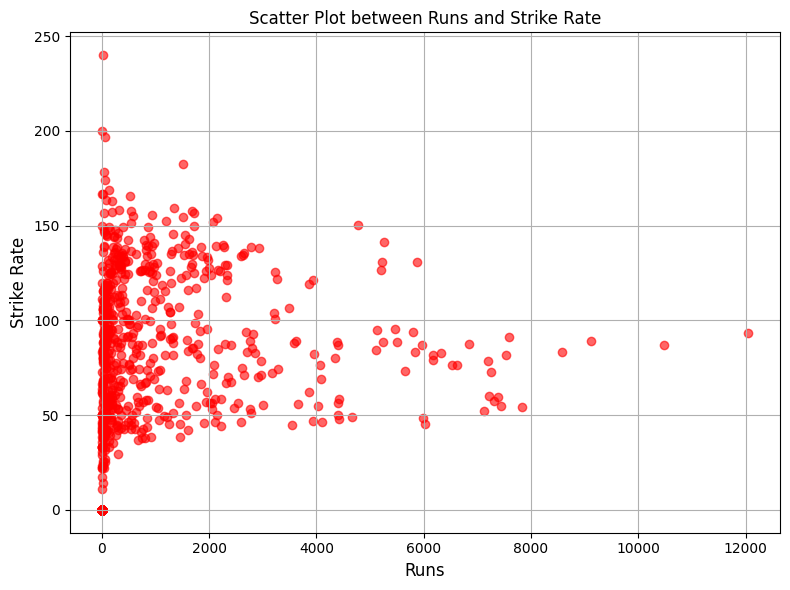

In [ ]:
def plot_runs_vs_strike_rate(data):
    """
    Plot a scatter plot between Runs and Strike Rate.

    Parameters:
        data (DataFrame): DataFrame containing player data.

    Returns:
        None
    """
    # Extracting two features for the scatter plot
    feature1 = data['Runs']
    feature2 = data['SR']  # SR stands for Strike Rate

    # Creating the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(feature1, feature2, color='red', alpha=0.6)
    plt.title('Scatter Plot between Runs and Strike Rate', fontsize = 12)
    plt.xlabel('Runs', fontsize = 12)
    plt.ylabel('Strike Rate', fontsize = 12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_runs_vs_strike_rate(data)


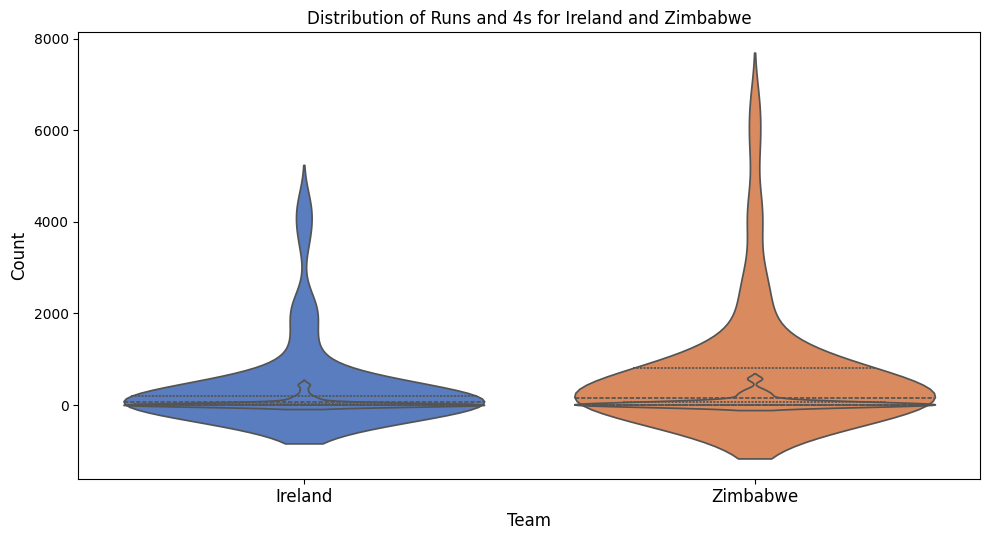

In [ ]:
def plot_runs_and_4s_distribution(data_file):
    """
    Plot violin plots showing the distribution of Runs and 4s for players from Ireland and Zimbabwe.

    Parameters:
        data_file (str): File path of the CSV file containing player data.

    Returns:
        None
    """
    # Filtering data for players from Ireland and Zimbabwe
    filtered_data = data[data['Team'].isin(['Ireland', 'Zimbabwe'])]

    # Creating the violin plot
    plt.figure(figsize=(10, 5.5))
    sns.violinplot(x="Team", y="Runs", data=filtered_data, hue="Team", palette="muted", inner="quartile", legend=False)
    sns.violinplot(x="Team", y="4s", data=filtered_data, hue="Team", palette="muted", inner="quartile", legend=False)
    plt.title('Distribution of Runs and 4s for Ireland and Zimbabwe', fontsize = 12)
    plt.xlabel('Team', fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    plt.tight_layout()
    plt.show()

plot_runs_and_4s_distribution("bat.csv")


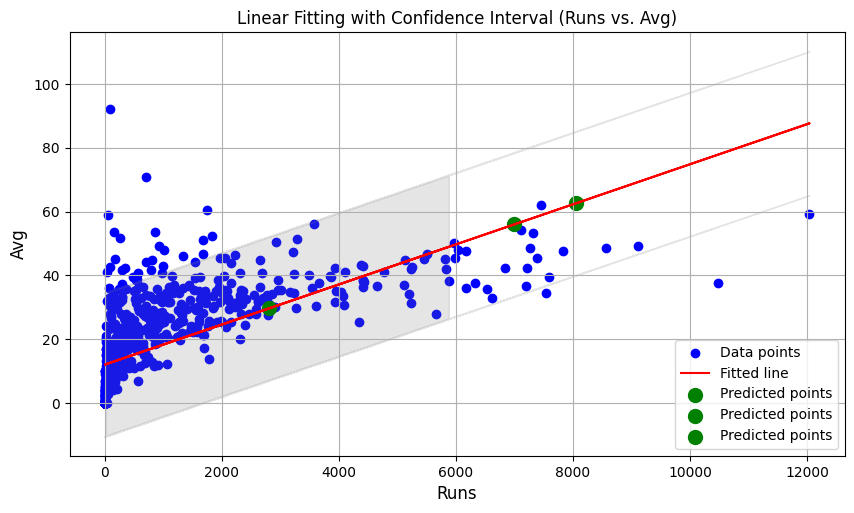

Slope: 0.006279874414196408
Intercept: 12.019714405960443
Confidence Interval (95%): 22.53244493362482


In [ ]:
def line_fitting(x, y):
    """
    Perform linear fitting and visualize the fitted line with confidence interval.

    Parameters:
        x : Independent variable (x-axis).
        y : Dependent variable (y-axis).

    Returns:
        tuple: Tuple containing slope, intercept, and confidence interval of the fitted line.
    """
    # Fitting a degree 1 using polyfit function.
    coefficients = np.polyfit(x, y, 1)

    # getting slope and y-intercept from the coefficients
    m, b = coefficients

    # Generate predicted y-values based on the line equation.
    y_pred = m * x + b

    # Calculating residuals
    residuals = y - y_pred

    # calculating the variance for the residuals
    variance = np.sum(residuals ** 2) / (len(x) - 2)

    # Calculating the standard error of the estimate
    std_error = np.sqrt(variance)

    # Calculate the t-value for a 95% confidence interval.
    t_value = 1.96

    # Calculating the confidence interval.
    confidence_interval = t_value * std_error

    # Plot the figure with size 10 X 5.5.
    plt.figure(figsize=(10, 5.5))
    # plotting the data points on the axis using scatter plot.
    plt.scatter(x, y, color='blue', label='Data points')
    # Fitting the best fit line on the data points.
    plt.plot(x, y_pred, color='red', label='Fitted line')

    # Plot error bars for the confidence interval
    plt.fill_between(x, y_pred - confidence_interval, y_pred + confidence_interval, color='gray', alpha=0.2)

    # Plot predictions with uncertainties
    predictions_x = [7000, 8050, 2800]
    for pred_x in predictions_x:
        pred_y = m * pred_x + b
        plt.scatter(pred_x, pred_y, color='green', marker='o', label='Predicted points', s=100)  # Increased marker size

    #  Adding the X and Y labels for the plot.
    plt.xlabel('Runs', fontsize = 12)
    plt.ylabel('Avg', fontsize = 12)
    # add the titles for the plot.
    plt.title('Linear Fitting with Confidence Interval (Runs vs. Avg)', fontsize = 12)
    plt.legend()
    # Adding the grid.
    plt.grid(True)
    plt.show()

    return m, b, confidence_interval



# Independent variable (x-axis)
x = data['Runs']
# Dependent variable (y-axis)
y = data['Avg']

# fitting the best fit line along with confidence interval 95%.
slope, intercept, confidence_interval = line_fitting(x, y)
# printing the slope.
print("Slope:", slope)
# printing the intercept.
print("Intercept:", intercept)
# printing the value at the confidence interval 95%.
print("Confidence Interval (95%):", confidence_interval)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

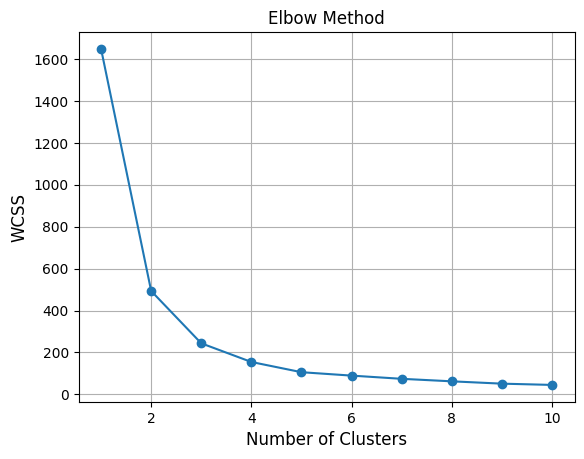

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


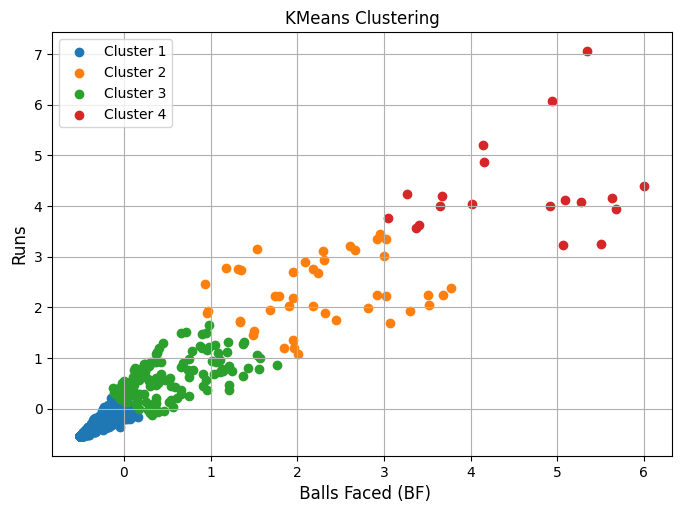

In [ ]:
# Assuming data is a DataFrame containing 'BF' (Balls Faced) and 'Runs' columns

# StandardScaler initialization
scaler = StandardScaler()

# Preprocessing function to standardize the data
def preprocess_data(data):
    return scaler.fit_transform(data[['BF', 'Runs']])

# Performing elbow method to determine the optimal number of clusters
def perform_elbow_method(data_scaled):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss, marker='o')
    plt.xlabel('Number of Clusters', fontsize = 12)
    plt.ylabel('WCSS', fontsize = 12)
    plt.title('Elbow Method', fontsize = 12)
    plt.grid(True)
    plt.show()
    return 4  # Assuming the optimal number of clusters is determined to be 4

# Visualizing clusters
def visualize_clusters(data_scaled, optimal_num_clusters):
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)

    plt.figure(figsize=(8, 5.5))
    for cluster_label in range(optimal_num_clusters):
        plt.scatter(data_scaled[cluster_labels == cluster_label, 0],
                    data_scaled[cluster_labels == cluster_label, 1],
                    label=f'Cluster {cluster_label + 1}')

    plt.xlabel(' Balls Faced (BF)', fontsize = 12)
    plt.ylabel('Runs', fontsize = 12)
    plt.title('KMeans Clustering', fontsize = 12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Preprocessing the data
data_scaled = preprocess_data(data)

# Performing elbow method to determine the optimal number of clusters
optimal_num_clusters = perform_elbow_method(data_scaled)

# Performing KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)

# Visualizing the clusters
visualize_clusters(data_scaled, optimal_num_clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


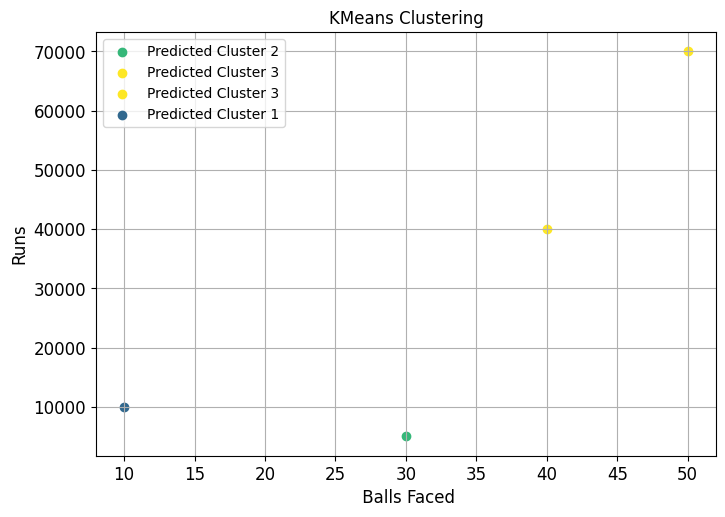

Predicted labels for new data points: [2 3 3 1]


In [ ]:
X_new = np.array([[30, 5000], [40, 40000], [50, 70000], [10, 10000]])
# Predict cluster labels for new data points
def predict_new_data(X, kmeans):
    scaled_X = scaler.transform(X)
    return kmeans.predict(scaled_X)

predicted_labels = predict_new_data(X_new, kmeans)

# Generate colors randomly based on the number of clusters
colors = plt.cm.viridis(np.linspace(0, 1, optimal_num_clusters))

# Plot the new data points with colors corresponding to their predicted clusters
plt.figure(figsize=(8, 5.5))
for i, label in enumerate(predicted_labels):
    plt.scatter(X_new[i, 0], X_new[i, 1], color=colors[label], label=f'Predicted Cluster {label}')
plt.xlabel(' Balls Faced', fontsize=12)
plt.xticks(fontsize = 12)
plt.ylabel('Runs', fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('KMeans Clustering', fontsize= 12)
plt.legend()
plt.grid(True)
plt.show()

print("Predicted labels for new data points:", predicted_labels)

In [ ]:
data.drop(columns=['50', '100', '200'], inplace=True)


In [ ]:
# Generating descriptive statistics using describe function
description = data.describe()
# printing description
description

,M,Inn,NO,Runs,HS,Avg,BF,SR,4s,6s
count,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000,824.000000
mean,36.883495,33.771845,5.723301,871.938107,56.901699,17.495376,1111.373786,70.073653,85.030340,18.408981
std,46.716523,45.648122,7.993536,1584.052397,60.326683,15.197254,2208.375794,49.335235,161.598697,35.049439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,7.000000,5.000000,2.330000,11.000000,35.740000,0.000000,0.000000
50%,20.000000,15.000000,3.000000,163.500000,39.000000,15.585000,194.000000,72.750000,14.000000,4.000000
75%,54.000000,48.000000,8.000000,970.750000,93.250000,29.417500,1137.250000,109.977500,93.000000,22.000000
max,300.000000,294.000000,54.000000,12040.000000,335.000000,92.000000,14356.000000,240.000000,1130.000000,349.000000


In [ ]:
# Calculating the correlation matrix for the dataframe confusion_matrix_1
confusion_matrix_1 = data.corr(numeric_only=True)
confusion_matrix_1

,M,Inn,NO,Runs,HS,Avg,BF,SR,4s,6s
M,1.000000,0.919586,0.807168,0.797953,0.573974,0.504507,0.662978,0.381717,0.727740,0.755415
Inn,0.919586,1.000000,0.719800,0.932704,0.752317,0.614765,0.857923,0.302344,0.896288,0.779193
NO,0.807168,0.719800,1.000000,0.532978,0.359918,0.370090,0.440155,0.326252,0.453965,0.524103
Runs,0.797953,0.932704,0.532978,1.000000,0.793069,0.654569,0.944212,0.211896,0.982501,0.750721
HS,0.573974,0.752317,0.359918,0.793069,1.000000,0.851237,0.805208,0.353207,0.810913,0.577271
Avg,0.504507,0.614765,0.370090,0.654569,0.851237,1.000000,0.613972,0.530995,0.640904,0.524054
BF,0.662978,0.857923,0.440155,0.944212,0.805208,0.613972,1.000000,0.085607,0.961680,0.554564
SR,0.381717,0.302344,0.326252,0.211896,0.353207,0.530995,0.085607,1.000000,0.170273,0.401252
4s,0.727740,0.896288,0.453965,0.982501,0.810913,0.640904,0.961680,0.170273,1.000000,0.684971
6s,0.755415,0.779193,0.524103,0.750721,0.577271,0.524054,0.554564,0.401252,0.684971,1.000000


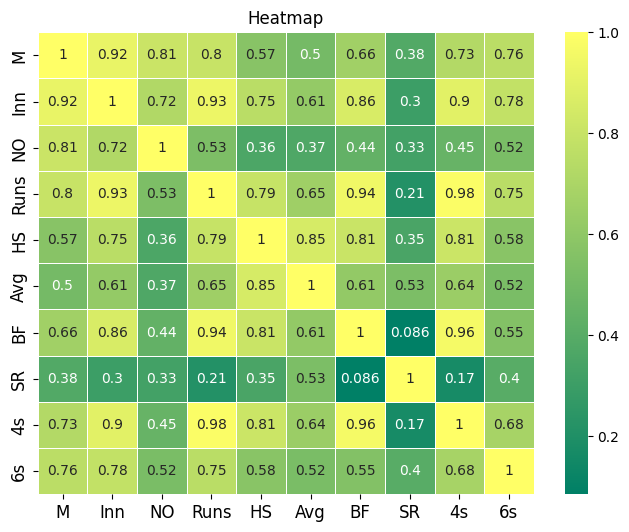

In [ ]:
def plot_heatmap(confusion_matrix_1, title='Heatmap of Correlation matrix'):
    """
    Plotting a heatmap of the confusion matrix.

    Parameters:
        confusion_matrix (array-like): Confusion matrix data.
        title (str, optional): Title of the plot. Defaults to 'Heatmap of Correlation matrix'.

    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_1, annot=True, cmap='summer', linewidths=0.5, fmt='.2g', linecolor='white')
    plt.title(title, fontsize = 12)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.show()
plot_heatmap(confusion_matrix_1, title='Heatmap')


In [ ]:
# Calculate the mean for each column
mean_values = data.mean(numeric_only=True)

# Print the mean values
print("Mean values for each column:")
print(mean_values)

Mean values for each column:
M         36.883495
Inn       33.771845
NO         5.723301
Runs     871.938107
HS        56.901699
Avg       17.495376
BF      1111.373786
SR        70.073653
4s        85.030340
6s        18.408981
dtype: float64


In [ ]:
# Calculate the median for each column
median_values = data.median(numeric_only=True)

# Print the median values
print("median values for each column:")
print(median_values)

median values for each column:
M        20.000
Inn      15.000
NO        3.000
Runs    163.500
HS       39.000
Avg      15.585
BF      194.000
SR       72.750
4s       14.000
6s        4.000
dtype: float64


In [ ]:
# Calculate the standard deviation for each column
std_values = data.std(numeric_only=True)

# Print the mean values
print("standard deviation values for each column:")
print(std_values)

standard deviation values for each column:
M         46.716523
Inn       45.648122
NO         7.993536
Runs    1584.052397
HS        60.326683
Avg       15.197254
BF      2208.375794
SR        49.335235
4s       161.598697
6s        35.049439
dtype: float64


In [ ]:
# Calculate the skewness for each column
skew_values = data.skew(numeric_only=True)

# Print the skewness values
print("skewness values for each column:")
print(skew_values)

skewness values for each column:
M       2.116944
Inn     2.073279
NO      2.204837
Runs    2.919065
HS      1.269305
Avg     0.616728
BF      3.233929
SR      0.036920
4s      3.088384
6s      3.919764
dtype: float64


In [ ]:
# Calculate the kurtosis for each column
kurtosis_values = data.kurtosis(numeric_only=True)

# Print the kurtosis values
print("kurtosis values for each column:")
print(kurtosis_values)

kurtosis values for each column:
M        5.561964
Inn      4.887322
NO       5.923506
Runs    10.025956
HS       1.558541
Avg     -0.054012
BF      11.686170
SR      -0.902238
4s      11.123348
6s      23.381388
dtype: float64
